
# **Στοιχεία ομάδας (Ομάδα 1):**
```
Neural Networks - Lab 1
Creators : 
Αναστάσης Αγγλογάλλος
Παναγιώτης Κοκκινάκης
Νικόλας Μπέλλος
```

# Μέρος 2. Kaggle dataset (codon-usage)

Το [Dataset](http://https://www.kaggle.com/datasets/meetnagadia/condon-usage-dataset) που θα μελετήσουμε, περιέχει πληροφορίες για την συχνότητα εμφάνισης κωδικονίων στην γονιδιωματική κωδικοποίηση διαφόρων οργανισμών. Έχουμε 13028 δείγματα που χαρακτηρίζονται από 69 χαρακτηριστικά το καθένα, χωρίς να αγνοείται καμία τιμή. Από τα 69 αυτά χαρακτηριστικά τα 64 είναι η συχνότητες εμφάνισης κάθε κωδικονίου, ενώ τα υπόλοιπα 5 είναι το "βασίλειο" στο οποίο ανήκει ο οργανισμός, ο τύπος DNA του, ο αριθμός κωδικονίων του και το όνομα του. Τα δεδομένα προέρχονται από τον τομέα Υπολογιστικής Βιοιατρικής και Επιστήμης Δεδομένων, του πανεπιστημίου του Σικάγο.

In [158]:
# Import neccessairy libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import time

### Read Data Set

In [159]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/condon-usage-dataset/codon_usage.csv


In [160]:
import numpy as np
import pandas as pd

# to print arrray inline
pd.set_option('expand_frame_repr', False)

all_data = pd.read_csv("/kaggle/input/condon-usage-dataset/codon_usage.csv", header=None, low_memory=False, encoding = "utf_8", sep=",")
print(all_data.head)

<bound method NDFrame.head of             0        1          2         3                                        4        5        6        7        8        9   ...       59       60       61       62       63       64       65       66       67       68
0      Kingdom  DNAtype  SpeciesID   Ncodons                              SpeciesName      UUU      UUC      UUA      UUG      CUU  ...      CGG      AGA      AGG      GAU      GAC      GAA      GAG      UAA      UAG      UGA
1          vrl        0     100217      1995  Epizootic haematopoietic necrosis virus  0.01654  0.01203    5e-04  0.00351  0.01203  ...  0.00451  0.01303  0.03559  0.01003  0.04612  0.01203  0.04361  0.00251    5e-04        0
2          vrl        0     100220      1474                         Bohle iridovirus  0.02714  0.01357  0.00068  0.00678  0.00407  ...  0.00136  0.01696  0.03596  0.01221  0.04545   0.0156   0.0441  0.00271  0.00068        0
3          vrl        0     100755      4862             Sweet pot

### Clean Data Set

In [161]:
# Remove all dirty data (non-float data)
# is_float -> returns TRUE if x can be float or FALSE if not
def is_float(x):
    try:
        float(x)
    except ValueError:
        return False
    return True

print("Current Rows (+ header): ", all_data.shape[0])

# Float data are in columns 5-68
for i in range (5, 69):
    all_data = all_data[all_data[i].apply(lambda x: is_float(x))]
    
print("New Rows: ", all_data.shape[0])

Current Rows (+ header):  13029
New Rows:  13026


### Split Data Set (train, test)

In [162]:
from sklearn.model_selection import train_test_split

# Remove headers (removed in previous step)
# all_data = all_data.iloc[1:]

# Get characteristics and targets
all_data_y = all_data.iloc[:, 0] # ROW 0
all_data_x = all_data.iloc[:, 1:] # ROWS 1-69

# Quanize the characteristic in column 3 (ncodons)
all_data_x[3] = pd.qcut(all_data_x[3].astype(float), 100, labels=False)

# Remove unwanted characteristics
all_data_x = all_data_x.drop(columns = 1)
all_data_x = all_data_x.drop(columns = 2)
all_data_x = all_data_x.drop(columns = 3)
all_data_x = all_data_x.drop(columns = 4)
print("Data shapes (X),(Y): ", all_data_x.shape, all_data_y.shape, "\n")
print(all_data_x.head)

Data shapes (X),(Y):  (13026, 64) (13026,) 

<bound method NDFrame.head of             5        6        7        8        9        10       11       12       13       14  ...       59       60       61       62       63       64       65       66       67       68
1      0.01654  0.01203    5e-04  0.00351  0.01203  0.03208    0.001   0.0401  0.00551  0.02005  ...  0.00451  0.01303  0.03559  0.01003  0.04612  0.01203  0.04361  0.00251    5e-04        0
2      0.02714  0.01357  0.00068  0.00678  0.00407  0.02849  0.00204   0.0441  0.01153   0.0251  ...  0.00136  0.01696  0.03596  0.01221  0.04545   0.0156   0.0441  0.00271  0.00068        0
3      0.01974   0.0218  0.01357  0.01543  0.00782  0.01111  0.01028  0.01193  0.02283  0.01604  ...  0.00596  0.01974  0.02489  0.03126  0.02036  0.02242  0.02468  0.00391        0  0.00144
4      0.01775  0.02245  0.01619  0.00992  0.01567  0.01358   0.0094  0.01723  0.02402  0.02245  ...  0.00366   0.0141  0.01671   0.0376  0.01932  0.03029  0.034

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [163]:
# Split datasets into TRAIN and TEST set
x_train, x_test, y_train, y_test = train_test_split(all_data_x, all_data_y, test_size = 0.20, random_state=42, stratify=all_data_y)
print("Data shapes (X_TRAIN),(Y_TRAIN): ", x_train.shape, y_train.shape, "\n")
print("Data shapes (X_TEST),(Y_TEST): ", x_test.shape, y_test.shape)

Data shapes (X_TRAIN),(Y_TRAIN):  (10420, 64) (10420,) 

Data shapes (X_TEST),(Y_TEST):  (2606, 64) (2606,)


In [164]:
# Find all possible values
y_values = all_data_y.value_counts().keys().tolist()
print(y_values)

# Map strings to values
y_values_dict = dict([(y, x+1) for x,y in enumerate(y_values)])
print(y_values_dict)

['bct', 'vrl', 'pln', 'vrt', 'inv', 'mam', 'phg', 'rod', 'pri', 'arc', 'plm']
{'bct': 1, 'vrl': 2, 'pln': 3, 'vrt': 4, 'inv': 5, 'mam': 6, 'phg': 7, 'rod': 8, 'pri': 9, 'arc': 10, 'plm': 11}


## Out-of-the-box

In [165]:
# Import all neccessairy libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import seaborn as sns; sns.set()
import optuna
from optuna.samplers import TPESampler

### Dummy Classifier

Διαλέγουμε 2 από τους dummy classifiers του 1ου μέρους. 
Τον Most Frequent και τον Stratified γιατί αυτοί οι 2 λαμβάνουν υπόψην τη κατανομή του dataset και επομένως περιμένουμε να είναι και αυτοί με το μεγαλύτερο accuracy.

In [166]:
# Dummy Classifier for comparison
from sklearn.dummy import DummyClassifier

dummy_clf_mf = DummyClassifier(strategy="most_frequent")
dummy_clf_str = DummyClassifier(strategy="stratified")

In [167]:
# Fit & Predict
dummy_accuracy_test = {}

#1
dummy_clf_mf.fit(x_train, y_train)
dummy_accuracy_test['most frequent'] = dummy_clf_mf.score(x_test, y_test)
#2
dummy_clf_str.fit(x_train, y_train)
dummy_accuracy_test['stratified'] = dummy_clf_str.score(x_test, y_test)

# Sort the accuracies
print("Classification Accuracy for the Train Set \n")
dummy_sorted_accuracy = [(k, dummy_accuracy_test[k]) for k in sorted(dummy_accuracy_test, key=dummy_accuracy_test.get, reverse=True)]
print("Dummy Classifiers Scores")
for clf, score in dummy_sorted_accuracy:
  print(str(clf) + "\t\t: ", score)

Classification Accuracy for the Train Set 

Dummy Classifiers Scores
most frequent		:  0.22409823484267075
stratified		:  0.17651573292402148


### Mylti-Layer Perceptron (MLP)

In [206]:
from sklearn.neural_network import MLPClassifier # "Multi Layer Perceptron Classifier"

# Fit, Train the model (default parameters)
mlp_clf = MLPClassifier()
mlp_train_start = time.time()

mlp_clf.fit(x_train, y_train)

print("MLP train duration: %s seconds" % (time.time() - mlp_train_start))

MLP train duration: 28.691890001296997 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [169]:
#Training set accuracy and f1-macro score
# 10-cross validation
mlp_accuracy_train = cross_val_score(mlp_clf, x_train, y_train, scoring='accuracy', cv = 5)
mlp_f1_train = cross_val_score(mlp_clf, x_train, y_train, scoring='f1_macro', cv = 5)
print("Training Set:")
print("MLP accuracy: ", np.mean(mlp_accuracy_train))
print("MLP f1: ", np.mean(mlp_f1_train))

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

Training Set:
MLP accuracy:  0.8517274472168908
MLP f1:  0.5737191642815659


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [207]:
#Test set accuracy and f1-macro score
mlp_predict_start = time.time()
mlp_predictions = mlp_clf.predict(x_test)
print("MLP prediction duration: %s seconds" % (time.time() - mlp_predict_start))

mlp_accuracy_test = mlp_clf.score(x_test, y_test)
mlp_f1_test = f1_score(y_test, mlp_predictions, average='macro')

print("Test set:")
print("MLP accuracy: ", mlp_accuracy_test)
print("MLP f1: ", mlp_f1_test)

print(classification_report(y_test, mlp_predictions,target_names=y_values, zero_division=0))

MLP prediction duration: 0.04078078269958496 seconds
Test set:
MLP accuracy:  0.8534151957022257
MLP f1:  0.6084110136227098
              precision    recall  f1-score   support

         bct       0.64      0.36      0.46        25
         vrl       0.90      0.95      0.92       584
         pln       0.74      0.66      0.70       269
         vrt       0.69      0.80      0.74       114
         inv       0.87      0.45      0.60        44
         mam       0.00      0.00      0.00         4
         phg       0.86      0.88      0.87       505
         rod       0.73      0.22      0.34        36
         pri       0.64      0.16      0.26        43
         arc       0.89      0.93      0.91       566
         plm       0.86      0.94      0.90       416

    accuracy                           0.85      2606
   macro avg       0.71      0.58      0.61      2606
weighted avg       0.85      0.85      0.84      2606



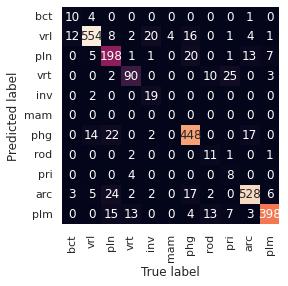

In [171]:
# Confusion Matrix
mlp_matrix = confusion_matrix(y_test, mlp_predictions)
sns.heatmap(mlp_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_values,
            yticklabels=y_values)
plt.xlabel('True label')
plt.ylabel('Predicted label');

### Support Vector Machines (SVM)

In [172]:
from sklearn.svm import SVC # "Support Vector Classifier"

# Fit, Train the model (default parameters)
# svm_clf = SVC(kernel='linear', C=1E10) # Default values
svm_clf = SVC()
svm_train_start = time.time()

svm_clf.fit(x_train, y_train)
print("SVM train duration: %s seconds" % (time.time() - svm_train_start))

SVM train duration: 2.7707762718200684 seconds


In [173]:
#Training set accuracy and f1-macro score
# 10-cross validation
svm_accuracy_train = cross_val_score(svm_clf, x_train, y_train, scoring='accuracy', cv = 5)
svm_f1_train = cross_val_score(svm_clf, x_train, y_train, scoring='f1_macro', cv = 5)
print("Training Set:")
print("SVM accuracy: ", np.mean(svm_accuracy_train))
print("SVM f1: ", np.mean(svm_f1_train))

Training Set:
SVM accuracy:  0.9095009596928982
SVM f1:  0.7255726181435291


In [174]:
#Test set accuracy and f1-macro score
predict_train_start = time.time()
svm_predictions = svm_clf.predict(x_test)
print("SVM predict duration: %s seconds" % (time.time() - predict_train_start))

svm_accuracy_test = svm_clf.score(x_test, y_test)
svm_f1_test = f1_score(y_test, svm_predictions, average='macro')

print("Test set:")
print("SVM accuracy: ", svm_accuracy_test)
print("SVM f1: ", svm_f1_test)
print(classification_report(y_test, svm_predictions,target_names=y_values, zero_division=0))

SVM predict duration: 1.3698296546936035 seconds
Test set:
SVM accuracy:  0.9201841903300076
SVM f1:  0.7515668672976826
              precision    recall  f1-score   support

         bct       0.94      0.60      0.73        25
         vrl       0.92      0.97      0.95       584
         pln       0.89      0.81      0.85       269
         vrt       0.84      0.85      0.85       114
         inv       0.96      0.50      0.66        44
         mam       0.00      0.00      0.00         4
         phg       0.94      0.93      0.94       505
         rod       0.82      0.64      0.72        36
         pri       0.92      0.53      0.68        43
         arc       0.92      0.97      0.95       566
         plm       0.94      0.98      0.96       416

    accuracy                           0.92      2606
   macro avg       0.83      0.71      0.75      2606
weighted avg       0.92      0.92      0.92      2606



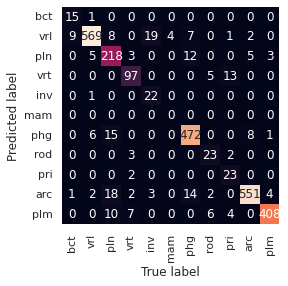

In [175]:
# Confusion Matrix
svm_matrix = confusion_matrix(y_test, svm_predictions)
sns.heatmap(svm_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_values,
            yticklabels=y_values)
plt.xlabel('True label')
plt.ylabel('Predicted label');

### Plots & Comparison

In [176]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.02,y[i],ha = 'center')

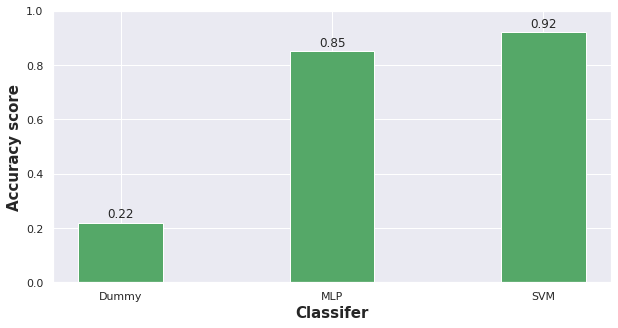

In [209]:
data_ootb_accuracy = {
    'Dummy': np.round(max(dummy_accuracy_test.values()), 2), 
    'MLP': np.round(mlp_accuracy_test, 2), 
    'SVM': np.round(svm_accuracy_test, 2), 
}

classifiers = list(data_ootb_accuracy.keys())
values_acc = list(data_ootb_accuracy.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(classifiers, values_acc, color ='g', width = 0.4)

plt.xlabel('Classifer', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy score', fontweight ='bold', fontsize = 15)

plt.ylim(0.0, 1.0) # Set min, max classifier scores
addlabels(classifiers, values_acc)
    
plt.show()

## Optimization

In [178]:
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

**Feature Selection**

---

Προσπαθήσαμε να κάνουμε dimensionality reduction με το να απορρίψουμε χαρακτηιστικά με σχετικά μικρό variance. Ωστόσο τα αποτελέσματα με βάση το accuracy χειροτέρευαν όσο μειώνονταν τα χαρακτηριστικά με αποτέλεσμα τα βέλτιστα μοντέλα να προκύψουν χωρίς Feature Selection.

In [179]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.00005)
# Reduce characteristics in Train Set
x_train_reduced = selector.fit_transform(x_train)
# Apply mask to Test Set
mask = selector.get_support()
x_test_reduced = x_test.values[:,mask]

print("Initial characteristics: ", np.shape(x_train)[1])
print("New characteristics: ", np.shape(x_train_reduced)[1])

# x_train = x_train_reduced
# x_test = x_test_reduced

Initial characteristics:  64
New characteristics:  48


**Dataset Balancing**

---

In [180]:
print("Current Dataset Size :")
print("Total: ", np.shape(y_train)[0])
print("Class bct: ", np.count_nonzero(y_train == 'bct'))
print("Class vrl: ", np.count_nonzero(y_train == 'vrl'))

Current Dataset Size :
Total:  10420
Class bct:  2335
Class vrl:  2265


In [181]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_train_res, y_train_res = ros.fit_resample(x_train, y_train)
print("New Dataset Size :")
print("Total: ", np.shape(y_train_res)[0])
print("Class bct: ", np.count_nonzero(y_train_res == 'bct'))
print("Class vrl: ", np.count_nonzero(y_train_res == 'vrl'))

# x_train = x_train_res
# y_train = y_train_res

New Dataset Size :
Total:  25685
Class bct:  2335
Class vrl:  2335


**Normalization**

---

Data are already normalized as they represent possibilities and all values lie between 0.0 and 1.0

### Mylti-Layer Perceptron (MLP)

In [200]:
def mlp_objective(trial):
    
    n_layers = trial.suggest_int('n_layers', 3, 6)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 15, 20))
    activation = trial.suggest_categorical("activation", ['identity', 'tanh'])

    #We use atom solver as its suited for large datasets and early stopping for time management
    clf = MLPClassifier(
        hidden_layer_sizes=tuple(layers),
        batch_size = 100,
        activation = activation,
        solver = 'adam', 
        max_iter = 400,
        shuffle = False,
    )
    
    clf.fit(x_train, y_train)
    
    return clf.score(x_test, y_test)

In [201]:
mlp_sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
mlp_study = optuna.create_study(direction="maximize", sampler=mlp_sampler)
mlp_study.optimize(mlp_objective, n_trials=20)

[I 2022-11-27 15:41:23,890] A new study created in memory with name: no-name-39458057-b0d6-424b-b5e6-63576a20aa38
[I 2022-11-27 15:41:41,692] Trial 0 finished with value: 0.8503453568687643 and parameters: {'n_layers': 4, 'n_units_0': 20, 'n_units_1': 19, 'n_units_2': 18, 'n_units_3': 15, 'activation': 'identity'}. Best is trial 0 with value: 0.8503453568687643.
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.

[I 2022-11-27 15:42:37,958] Trial 1 finished with value: 0.8749040675364543 and parameters: {'n_layers': 6, 'n_units_0': 18, 'n_units_1': 19, 'n_units_2': 15, 'n_units_3': 20, 'n_units_4': 19, 'n_units_5': 16, 'activation': 'tanh'}. Best is trial 1 with value: 0.8749040675364543.
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maxim

In [202]:
optuna.visualization.plot_optimization_history(mlp_study)

In [203]:
print("Best hyperparameters:")
mlp_study.best_params

Best hyperparameters:


{'n_layers': 5,
 'n_units_0': 20,
 'n_units_1': 16,
 'n_units_2': 16,
 'n_units_3': 17,
 'n_units_4': 17,
 'activation': 'tanh'}

In [204]:
mlp_best_params = mlp_study.best_params

layers_opt = []
for i in range(mlp_best_params['n_layers']):
    layers_opt.append(mlp_best_params[f'n_units_{i}'])
            
mlp_clf_opt = MLPClassifier(
    hidden_layer_sizes=tuple(layers_opt),
    batch_size = 100,
    activation = mlp_best_params['activation'],
    solver = 'adam', 
    max_iter = 400,
    shuffle = False,
)
mlp_clf_opt.fit(x_train, y_train)

#Test set accuracy and f1-macro score
mlp_predictions_opt = mlp_clf_opt.predict(x_test)

mlp_accuracy_test_opt = mlp_clf_opt.score(x_test, y_test)
mlp_f1_test_opt = f1_score(y_test, mlp_predictions_opt, average='macro')

print("Test set:")
print("MLP accuracy: ", mlp_accuracy_test_opt)
print("MLP f1: ", mlp_f1_test_opt)
print(classification_report(y_test, mlp_predictions_opt, target_names=y_values, zero_division=0))

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.



Test set:
MLP accuracy:  0.884113584036838
MLP f1:  0.70454843318196
              precision    recall  f1-score   support

         bct       0.65      0.60      0.63        25
         vrl       0.92      0.94      0.93       584
         pln       0.86      0.73      0.79       269
         vrt       0.74      0.79      0.76       114
         inv       0.94      0.68      0.79        44
         mam       0.00      0.00      0.00         4
         phg       0.86      0.92      0.89       505
         rod       0.59      0.61      0.60        36
         pri       0.80      0.37      0.51        43
         arc       0.92      0.93      0.93       566
         plm       0.92      0.94      0.93       416

    accuracy                           0.88      2606
   macro avg       0.74      0.68      0.70      2606
weighted avg       0.88      0.88      0.88      2606



### Support Vector Machines (SVM)

[Sci-kit learn library](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [187]:
# Hyperparameter setting based on accuracy
def svm_objective(trial):
    
    strtfdKFold = StratifiedKFold(n_splits=5)
    
    # Hyperparameters
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    C = trial.suggest_float('C', 0.6, 2.0, step=0.2)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto']) # 0.00025, 0.002, step=0.00025
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    # PCA (dimensionality reduction)
    # We don't use it because it produced worse results based on accuracy
    # pca = RandomizedPCA()
    
    svm = SVC(
        kernel = kernel,
        C = C,
        gamma = gamma,
        class_weight = class_weight,
        random_state = 42,
    )
     
    svm.fit(x_train, y_train)

    return svm.score(x_test, y_test)

In [188]:
svm_sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
svm_study = optuna.create_study(direction="maximize", sampler=svm_sampler)
svm_study.optimize(svm_objective, n_trials=25)

[I 2022-11-27 15:25:03,360] A new study created in memory with name: no-name-aed8efa5-0a50-42a0-9004-097e6adfb85c
[I 2022-11-27 15:25:06,114] Trial 0 finished with value: 0.9378357636224098 and parameters: {'kernel': 'poly', 'C': 0.8, 'gamma': 'scale', 'class_weight': None}. Best is trial 0 with value: 0.9378357636224098.
[I 2022-11-27 15:25:33,150] Trial 1 finished with value: 0.22409823484267075 and parameters: {'kernel': 'rbf', 'C': 0.8, 'gamma': 'auto', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9378357636224098.
[I 2022-11-27 15:25:49,456] Trial 2 finished with value: 0.22409823484267075 and parameters: {'kernel': 'rbf', 'C': 1.0, 'gamma': 'auto', 'class_weight': None}. Best is trial 0 with value: 0.9378357636224098.
[I 2022-11-27 15:26:06,460] Trial 3 finished with value: 0.22409823484267075 and parameters: {'kernel': 'sigmoid', 'C': 0.8, 'gamma': 'auto', 'class_weight': None}. Best is trial 0 with value: 0.9378357636224098.
[I 2022-11-27 15:26:11,001] Trial 4 fin

In [189]:
optuna.visualization.plot_optimization_history(svm_study)

In [190]:
print("Best hyperparameters:")
svm_study.best_params

Best hyperparameters:


{'kernel': 'poly', 'C': 2.0, 'gamma': 'scale', 'class_weight': None}

In [191]:
svm_best_params = svm_study.best_params
svm_clf_opt = SVC(**svm_best_params)
svm_clf_opt.fit(x_train, y_train)

#Test set accuracy and f1-macro score
svm_predictions_opt = svm_clf_opt.predict(x_test)

svm_accuracy_test_opt = svm_clf_opt.score(x_test, y_test)
svm_f1_test_opt = f1_score(y_test, svm_predictions_opt, average='macro')

print("Test set:")
print("SVM accuracy: ", svm_accuracy_test_opt)
print("SVM f1: ", svm_f1_test_opt)
print(classification_report(y_test, svm_predictions_opt, target_names=y_values, zero_division=0))

Test set:
SVM accuracy:  0.9458940905602455
SVM f1:  0.8106003354591952
              precision    recall  f1-score   support

         bct       0.76      0.88      0.81        25
         vrl       0.95      0.97      0.96       584
         pln       0.90      0.91      0.91       269
         vrt       0.96      0.89      0.92       114
         inv       0.97      0.77      0.86        44
         mam       0.00      0.00      0.00         4
         phg       0.96      0.93      0.95       505
         rod       0.75      0.75      0.75        36
         pri       0.78      0.84      0.81        43
         arc       0.95      0.98      0.97       566
         plm       0.98      0.98      0.98       416

    accuracy                           0.95      2606
   macro avg       0.82      0.81      0.81      2606
weighted avg       0.95      0.95      0.95      2606



### Plots & Comparison

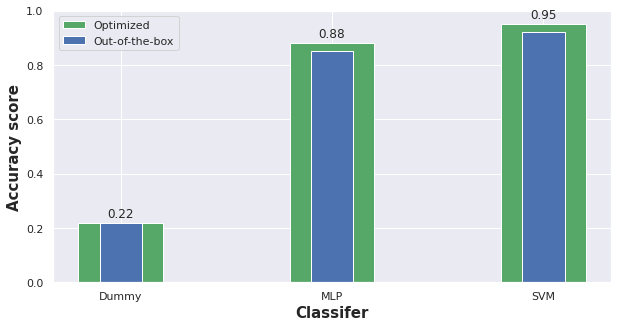

In [210]:
data_opt_accuracy = {
    'Dummy': np.round(max(dummy_accuracy_test.values()), 2), 
    'MLP': np.round(mlp_accuracy_test_opt, 2), 
    'SVM': np.round(svm_accuracy_test_opt, 2), 
}

classifiers = list(data_opt_accuracy.keys())
values_acc_opt = list(data_opt_accuracy.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(classifiers, values_acc_opt, color ='g', width = 0.4, label='Optimized')
plt.bar(classifiers, values_acc, color ='b', width = 0.2, label='Out-of-the-box')

plt.xlabel('Classifer', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy score', fontweight ='bold', fontsize = 15)

plt.ylim(0.0, 1.0) # Set min, max classifier scores
addlabels(classifiers, values_acc_opt)
    
plt.legend()
plt.show()

**Table of results**

| Classifier | train time (sec) | predict time (sec) | ootb accuracy / <br>f1 score | optimized accuracy /<br> f1 score |
| --- | :---: | :---: | :---: | :---: |
| Dummy | - | - | 0.22 | 0.22 |
| MLP | 29.89 | 0.04 | **0.85** <br>/ 0.60 | **0.88** <br>/ 0.70 |
| SVM | 2.73 | 1.37 | **0.92** <br>/ 0.75 | **0.95** <br>/ 0.81 |

**Elaborating about the process**

---



Για να οδηγηθούμε από τα μοντέλα out-of-the-box στα optimized μοντέλα των MLP και SVM ακολουθήσαμε μια σειρά βημάτων.
1. Προσπαθήσαμε να τροποιήσουμε το train data set με τέτοιο τρόπο ώστε μην υπονομέυσουμε κάποια κλάση κατά την εκπαίδευση εφαρμόζοντας τις τεχνικές των Normalization και Oversampling αλλά και να προσπαθήσουμε να μειώσουμε τις διαστάσεις των δεδομένων με τη τεχνική του Feature Selection.
Παρατηρήσαμε ωστόσο, ότι οι τεχνικές αυτές χειροτέρευαν την επίδοση του μοντέλου μας για τα ίδια δεδομένα train και test, το οποίο μάλλον οφείλεται στην ποσότητα των δεδομένων η οποία δεν επιτάσει στο να τα αυξήσουμε με τεχνητό τρόπο, αλλά και στη ποιότητά τους, καθώς όλα τα χαρακτηριστικά του dataset αποτελούν κάποια ξεχωριστή ακολουθία πρωτεινών την οποία αν αφαιρέσεσουμε θα επηρεάσει και άλλα χαρακτηριστικά και άρα και τα αποτελέσματά μας.
2. Για κάθε ταξινομητή βρίκαμε ποιές είναι οι κυριότερες υπερπαράμετροι που τον χαρακτηρίζουν και χρησιμοποιήσαμε τη βιβλιοθήκη optuna για προσπαθήσουμε να τις βελτιστοποιήσουμε. Εκτελέσαμε έως και 100 επαναλήψεις στο κάθε μοντέλο με διαφορετικές υπερπαραμέτρους σε κάθε επανάληψη από τις οποίες και προέκυψαν οι υπερπαράμετροι που βελτισοποίησαν τελικά τα μοντέλα μας με βάση τη μετρική accuracy (Η βελτίωση ήταν τελικά της τάξης του 5%, το οποίο σημαίνει ότι οι default παράμετροι ήταν σχετικά καλοί από την αρχή). 
Αυτό που παρατηρήσαμε εδώ είναι πως μία και μόνο υπερπαράμετρος μπορούσε να μεταβάλει το ποσοστό επιτυχίας του μοντέλου σε βαθμό έως και να το μηδενίσει. Άρα είναι σημαντικό για κάθε μοντέλο να δοκιμάζουμε πολλές διαφορετικές παραμέτρους ώστε να μπορούμε καλύτερα να καταλάβουμε ποιες το επηρεάζουν περισσότερο και προς ποια κατεύθυνση και να πράτουμε αναλόγως για τη βελτίωση των αποτελεσμάτων.
3. Συγκρίναμε την επιδοση των ταξινομητών με βάση το accuracy στο test set (περιλάβαμε και το dummy για σύγκριση) όπου διαπιστώσαμε την ποσότητα της αύξησης του accuracy στο optimized μοντέλο σε σχέση με το out-of-the-box αλλά και το ποιος ταξινομητής είναι καταληλλότερος φαινομενικά για το συγκεκριμένο dataset.

**Conclusions**

---

Για την αξιολόγηση των μοντέλων έχουμε 3 κύρια κριτήρια. Το **accuracy**, το **training time** και το **prediction time**. 
1. Στο accuracy score το SVM έχει επίδοση 95% σε σχέση με το MLP το οποίο φτάνει στο 88%. Εδώ σημειώνουμε ότι οι επιδόσεις στο accuracy είναι αντίστοιχες με αυτές και στις υπόλοιπες μετρικές οι οποίες προκύπτουν από το confusion matrix οπως το f1. Το accuracy είναι η μετρική με τη μεγαλύτερη βαρύτητα σε αυτό το dataset καθώς μας νοιάζει περισσότερο το να προβλέψουμε σωστά το ζωικό βασίλειο κάθε οργανισμού και όχι τόσο το να το κάνουμε με το γρηγορότερο τρόπο.
2. Όσον αφορά το train time υπερτερεί και πάλι το SVM με χρόνους υποδεκαπλάσιους από αυτούς του MLP το οποιό μας επέτρεψε να δοκιμάσουμε περισσότερες υπερπαραμέτρους και επομένως να επιταχύνουμε τη διαδικασία της βελτιστοποίησης.
3. Στο prediction time παρατηρούμε ότι το MLP βρίσκεται σε καλύτερη θέση διότι για 2000 δεδομένα στο test set μας παρείχε predictions σε χρόνο υποδεκαπλάσιο σε σχέση με αυτόν του SVM, ο οποίος και πάλι ήταν κοντά στο 1 second.

To μοντέλο που υπερτερεί και **επιλέγουμε** είναι αυτό του **SVM** καθώς στη μετρική με τη μεγαλύτερη βαρύτητα που είναι το accuracy φτάνει το 95% σε σχέση με το MLP το οποίο φτάνει περίπου το 88%. Σε περίπτωση που θα θέλαμε να κάνουμε υπερβολικά πολλές προβλέψεις σε πολύ μικρό χρονικό διάστημα θα μπορούσαμε να χρησιμοποιήσουμε και τον MLP λόγω των χαμηλών χρόνων πρόβλεψης, αλλά συνήθως δεν είναι αυτό το ζητούμενο στο συγκεκριμένο dataset.